# 2023/24-XAI-LABS
Note that this lab has three levels: basic, regular and advanced.\
Doing the **basic** part earns you a grade of 5.5-6.0.\
Doing the **regular** part earns you a max grade of 8.\
Doing the **advanced** part earns you a max grade of 10.0.

Please return a Jupyter notebook as a submission in Canvas, to make the grading easier for us.

**Group No:** 9

**Student Name**: S3105555 Hakan Tirsi

**Student Name**:
**Student Name**:

#Lecture 2
The following set of exercises are related to the Lecture 1.
## Local Explanations: SHAP, LIME and Counterfactual Explanations

In this exercise we apply permutation feature importance to a real world dataset. We attempt is using two ways.
1. Using our own basic implmenattion of the algorithm
2. Using the exiting libraries

**Acknowledgement** : Some code is generated using chatgpt but it is tested for any errors.

In [1]:
# First of all import the required packages
# Load required libraries
#!pip install shap lime
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import shap
import lime
import lime.lime_tabular

We'll use the 'breast_cancer' dataset from 'sklearn.datasets', which is a binary classification problem.

In [2]:
# Load dataset
data =load_breast_cancer()
X=data.data
y=data.target

Split data into train and test. Fix the random state seed and also use 20% for testing

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Train a Model
One can use any classifier to train the model. Here we will use **random forest** classifier

In [4]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [5]:
# Lets us check how well our model is doing
from sklearn.metrics import classification_report

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



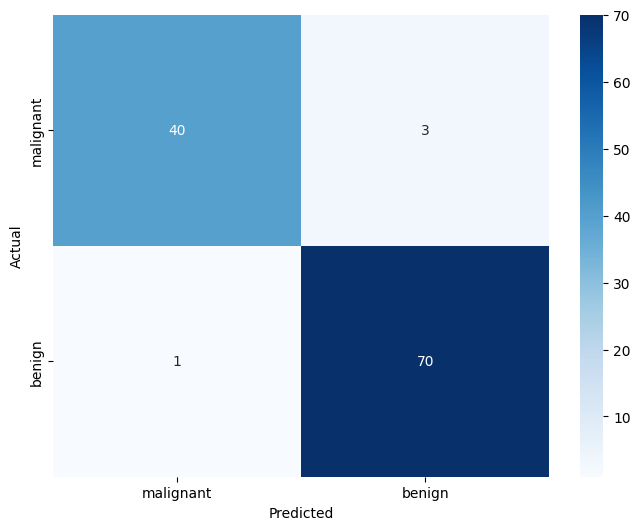

In [6]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=data.target_names,
            yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Let's also find the feature importance of the model:

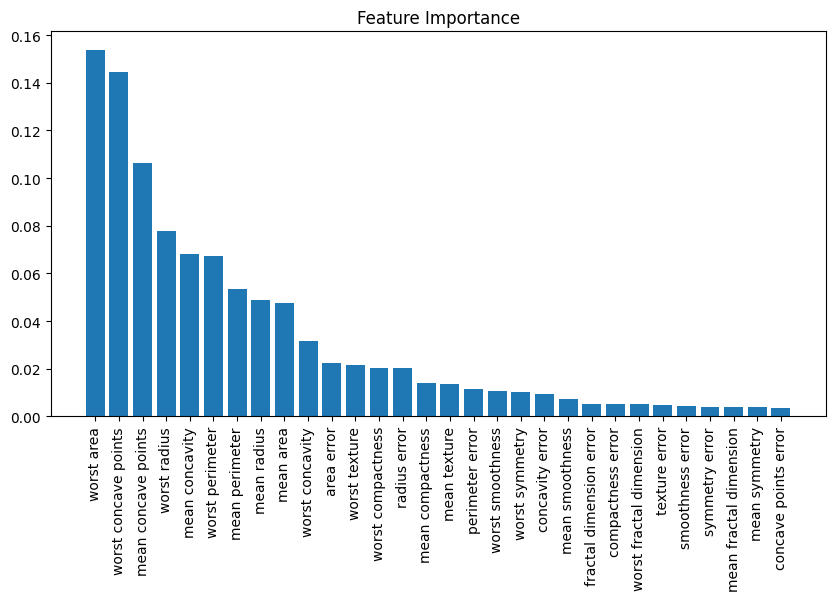

In [7]:
importances = clf.feature_importances_

import matplotlib.pyplot as plt
import numpy as np

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [data.feature_names[i] for i in indices]

# Create plot
plt.figure(figsize=(10, 5))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), names, rotation=90)
plt.show()


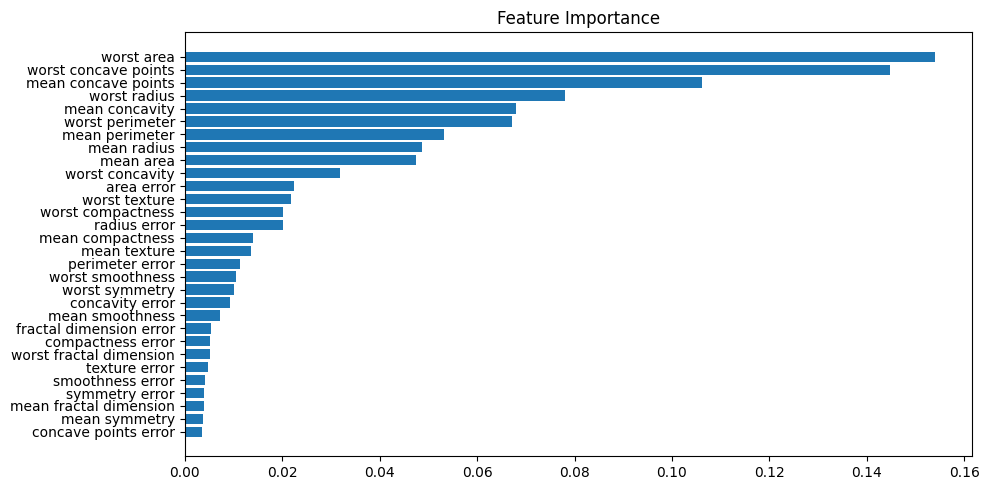

In [40]:

# Importances is a numpy array, we sort this array in Aescending order
indices = np.argsort(importances)
# We create a list, where the feature names gets combined with its value.
names = [data.feature_names[i] for i in indices]

#Creating A horizontal Barplot
plt.figure(figsize=(10, 5))
plt.title("Feature Importance")
plt.barh(range(X_train.shape[1]), importances[indices])
plt.yticks(range(X_train.shape[1]), names)
plt.tight_layout()
plt.show()


Certainly! Let’s break down the line of code names = [data.feature_names[i] for i in indices] and understand its purpose:

Objective:
The goal here is to create a list of feature names (names) that corresponds to the sorted feature importances.
We want to rearrange the feature names so that they match the order of importance (from highest to lowest).
Explanation:
indices contains the indices of features sorted in descending order of importance (as we discussed earlier).
data.feature_names likely represents an array or list of feature names (such as column names in a dataset).
The list comprehension [data.feature_names[i] for i in indices] iterates over each index in indices.
For each index i, it retrieves the corresponding feature name from data.feature_names and adds it to the names list.
Result:
The resulting names list contains feature names in the order of importance.
When we use this list later (for plotting, labeling, etc.), the feature names will match the sorted feature importances.

### (Basic)Exercise 1
## Exercise 1 (Basic): Feature Importance with SHAP

(a) Find one case for each of the situations TP, TN, FP, FN and use SHAP feature importance (global explanations) to explain the model's decisions for each case. Discuss the effectiveness of feature importance (summary plot, type="bar") in explaining these cases.  

Is the feature importance of shap (mean SHAP values) the same as the feature importance we got from the random forest model?


In [8]:
# Finding one example each for FP, FN, TP, TN
fp_index = None
fn_index = None
tp_index = None
tn_index = None

fp_found = False
fn_found = False
tp_found = False
tn_found = False

for i in range(len(y_test)):
    actual = y_test[i]
    predicted = y_pred[i]

    # False Positive (1 predicted, but actually 0)
    if predicted == 1 and actual == 0 and not fp_found:
        fp_index = i
        fp_found = True

    # False Negative (0 predicted, but actually 1)
    elif predicted == 0 and actual == 1 and not fn_found:
        fn_index = i
        fn_found = True

    # True Positive (1 predicted, actually 1)
    elif predicted == 1 and actual == 1 and not tp_found:
        tp_index = i
        tp_found = True

    # True Negative (0 predicted, actually 0)
    elif predicted == 0 and actual == 0 and not tn_found:
        tn_index = i
        tn_found = True

    # Break loop if all cases found
    if fp_found and fn_found and tp_found and tn_found:
        break

# Print indices for verification
print("FP Index:", fp_index)
print("FN Index:", fn_index)
print("TP Index:", tp_index)
print("TN Index:", tn_index)



FP Index: 20
FN Index: 8
TP Index: 0
TN Index: 1


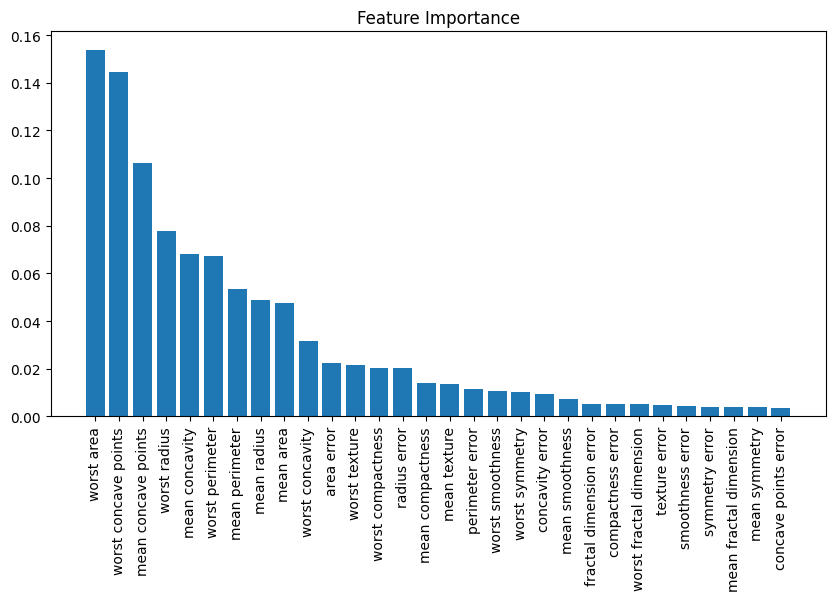

In [9]:
importances = clf.feature_importances_

import matplotlib.pyplot as plt
import numpy as np

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [data.feature_names[i] for i in indices]

# Create plot
plt.figure(figsize=(10, 5))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), names, rotation=90)
plt.show()

In [10]:

# Create explainer (Method 1: using Kernel Shap, faster). ## you can go for for other options
f = lambda x: clf.predict_proba(x)[:,1]
explainer = shap.KernelExplainer(f, X_train)
shap_values_clf = explainer.shap_values(X_test, nsamples=100) #you can increase the sample size if you want



# Continue from here



Using 455 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/114 [00:00<?, ?it/s]

Interpretation:
The resulting shap_values_clf contains SHAP values for each feature and each instance in the test data.
Positive SHAP values indicate features that contribute positively to the prediction, while negative values indicate features that contribute negatively.
By analyzing these values, you can understand which features are driving the model’s predictions.

In [25]:
print(shap_values_clf)

[[ 0.01498239  0.00120369  0.01355407 ...  0.05619472  0.
   0.        ]
 [-0.02705275 -0.00043082 -0.03314357 ... -0.06604316 -0.00738153
   0.        ]
 [-0.02142237 -0.00661689 -0.02051551 ... -0.05685954 -0.00555772
   0.0069703 ]
 ...
 [ 0.00314737  0.00784281  0.00777023 ...  0.04529179  0.00452777
   0.00356973]
 [ 0.00485442 -0.01073191  0.         ...  0.0586197   0.00404274
   0.00599836]
 [-0.02301164 -0.03325678 -0.02021778 ... -0.05386983  0.02287453
  -0.00839431]]


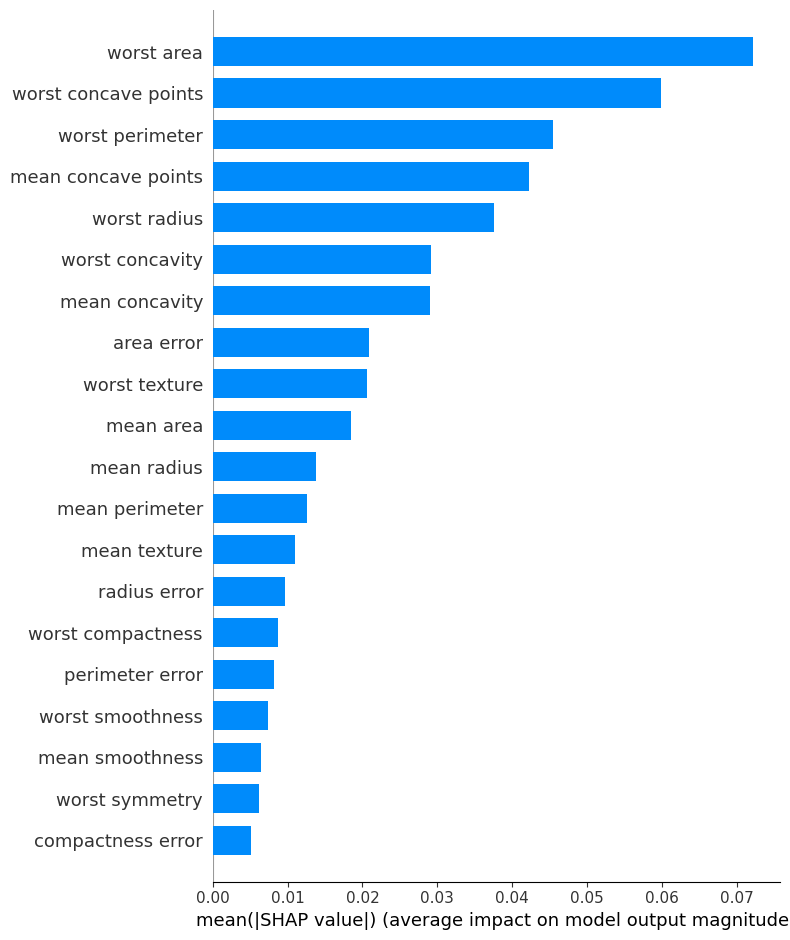

In [11]:
plot = shap.summary_plot(shap_values_clf,plot_type="bar", feature_names=data.feature_names, )

**Answer Excersise 1A**
(a) Find one case for each of the situations TP, TN, FP, FN and use SHAP feature importance (global explanations) to explain the model's decisions for each case. Discuss the effectiveness of feature importance (summary plot, type="bar") in explaining these cases.  

- With the help of feature importance, we get a general understanding of the most important features. But what really made the model predict an data point as FP or FN is not clear. With the help of the feature importance plots, we can indicate which features could cause a model to predict a value.


Is the feature importance of shap (mean SHAP values) the same as the feature importance we got from the random forest model?
- The feature importance of SHAP is almostsimiliar as the feature importance from the random forest model. 
Both indicate that the worst area and worst concava points are the most important features. After these 2, there is some shuffle between the ranking of other features.

**(b)** Are the feature importance explanations sufficient for understanding the model's decisions in each case? How much can you explain each case using feature importance alone?

**Answer:**
Using feature importance alone, one can only indicate which features are the most important and also could influenced the decision making of the model. But this is a general understanding for the whole data set and it could occur that for some specific data points, other features where more important. Thus, the limitation of feature importance occurs when one would like to know how individual predictions were made. It only provides a global understanding.

## Exercise 2 (Basic): Local Explanations with SHAP
**(a)** Use SHAP local explanations (try out different plots) for each of the 4 cases to explain how the model decides about each case.

In [58]:
# Use this block to write your code
## for example you can use the code below for one of the cases
shap.initjs()
shap_values_single = explainer.shap_values(X_test[8,:], nsamples=100)
shap.force_plot(explainer.expected_value, shap_values_single, X_test[8,:],feature_names=data.feature_names)

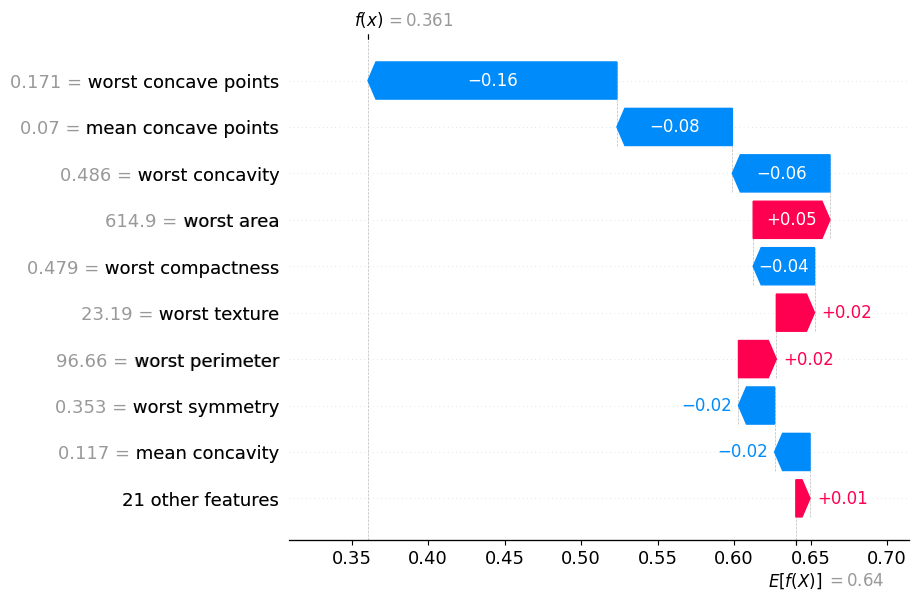

In [59]:
#Waterfall Plot
shap.waterfall_plot(shap.Explanation(values=shap_values_single,
                                     base_values=np.mean(y_pred),
                                     data=X_test[8,:],feature_names=data.feature_names))

**(b)** Write down your explanations in words (natural language) for the FP case based on the SHAP local explanations.

Answer:






**Answer:**

**(c)** Are the explanations of Lime and SHAP different?

## Exercise 3 (Basic) Local Interpretable Model-Agnostic Explanations (LIME)

(a) Use LIME approach to explain the 4 cases (TP,TN, FP, FN)

**Answer:**

In [45]:
import lime.lime_tabular

# Initialize LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(X_train, mode='classification', feature_names=data.feature_names)

# countinue from here


**(b)** Write down your explanations in words (natural language) for the FP case based on the LIME explanations.

**Answer**

## Exercise 4 (Regular): Local Surrogate Model Using Tree

(a) Implement a method to find a sample around a given case/point \( X \) in an epsilon neighborhood, to build a dataset to train a surrogate model. Give this sample to the model \( f \) to be explained, and consider the output \( f(X) \) as the target output in your built dataset. Train a decision tree on this dataset, creating a surrogate decision tree (g) that attempts to learn how \( f \) decides locally around \( X \). Control the depth of the tree to keep it simple. Assuming the decision tree is explainable, we could somehow explain how the model works for instance \( X \) using the structure of the tree and the the importance of feature in this tree.


In [46]:
# Use this block to write your code.


(b) Use your method to explain the 4 cases that you have.

In [47]:
# Use this block to write your code.


(c) How do you choose epsilon? What considerations should be taken into account when determining the size of the sample?

**Answer**

##Exercise 5 (Advanced): Counterfactual Instances
(a) Try to find counterfactual instances for the FP case. You are free to think about the ways you can find a few counterfactual cases where the outcome of the model is opposite (negative). The counterfactual points should satisfy the following properties:

Validity: The counterfactuals' predicted outcome is different from the original outcome.

Proximity: The counterfactuals should be similar to the query instance.

Sparsity: The counterfactuals should not require changing too many covariates.

Diversity: The counterfactuals should be different from one another.

Put some comments on your code to show the algorithm steps.

In [48]:
# Use this block to write your code.

**Answer:**